# Terminal digit analysis
### Aaron Stern

Summary: this notebook is consistent with the findings of the authors.

_______

The authors claim: *"[W]e also ran simulations generating data sets of triples of independent identical Poisson random variables with comparable means, and the distributions of terminal digits in these sets were consistent with the hypothesis of uniformity."*

In [19]:
import numpy as np
import scipy.stats as stats
from __future__ import division, generators, absolute_import, print_function
from openpyxl import load_workbook

import matplotlib.pyplot as plt

%matplotlib inline

In [42]:
terminal_digit=[]
td_se = []
for l in np.logspace(0,2,100):
    digits = np.mod(np.random.poisson(l,size=10000),10)
    terminal_digit.append(np.mean(digits))
    td_se.append(np.std(digits))
    

Somewhat obviously, this is a bad approximation for $\lambda \approx 10$. We investigated further by simulating $N=10000$ Pois RVs and calculating their mean terminal digit.

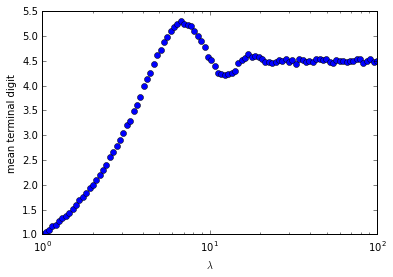

In [49]:
plt.semilogx(np.logspace(0,2,100),terminal_digit,'o')
plt.ylabel('mean terminal digit')
plt.xlabel(r'$\lambda$')

___________


## Application of terminal digits analysis to the datasets

### Colony counts: RTS

In [183]:
DATA_DIR = '../data/'
wb = load_workbook(DATA_DIR + 'Bishayee Colony Counts 10.27.97-3.8.01.xlsx') 

In [184]:
# code courtesy of Hue 

ws = wb.get_sheet_by_name('Sheet1')
rawData = []

for i in range(4, 1366):
    for col in ['D','E','F']:
        try:
            rawData.append(float(ws[col + str(i)].value))
        except:
            # if empty cell, report location in spreadsheet
            print(col,i)

F 23


In [185]:
terminal_digit = [np.mod(c,10) for c in rawData]

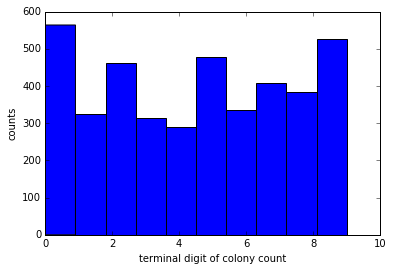

In [186]:
counts = plt.hist(terminal_digit)
plt.ylabel('counts')
plt.xlabel('terminal digit of colony count')

In [187]:
chisq=0
exp = np.sum(counts[0])/10
for (i,c) in enumerate(counts[0]):
    chisq += (c-exp)**2/exp

In [188]:
print(chisq)
print(1-stats.chi2.cdf(chisq,9))

200.725826193
0.0


**TODO:** examine mean count. Is it low? High?

### Colony counts: Others

F 32
F 35
F 37
F 38
F 39
F 41
F 241
E 270
F 270
F 308
F 363
F 428
F 429
F 431
F 439
F 506
F 507
E 517
F 534
F 555
F 569
E 576
F 576
E 599
F 599
E 600
F 600
E 601
F 601
D 624
E 624
F 624
D 625
E 625
F 625
1834.0


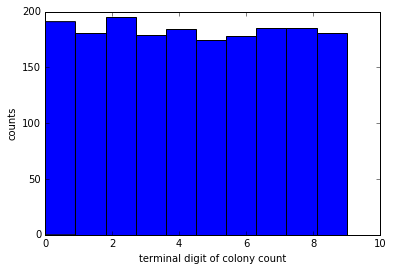

In [189]:
DATA_DIR = '../data/'
wb = load_workbook(DATA_DIR + 'Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx') 

ws = wb.get_sheet_by_name('Sheet1')
rawData = []

for i in range(3, 626):
    for col in ['D','E','F']:
        try:
            rawData.append(float(ws[col + str(i)].value))
        except:
            # if empty cell, report location in spreadsheet
            print(col,i)
            
terminal_digit = [np.mod(c,10) for c in rawData]
counts = plt.hist(terminal_digit)
plt.ylabel('counts')
plt.xlabel('terminal digit of colony count')

chisq=0
exp = np.sum(counts[0])/10

print(sum(counts[0]))

for (i,c) in enumerate(counts[0]):
    chisq += (c-exp)**2/exp

In [190]:
print(chisq)
print(1-stats.chi2.cdf(chisq,9))

1.79062159215
0.994362533772


### Outside lab colony counts

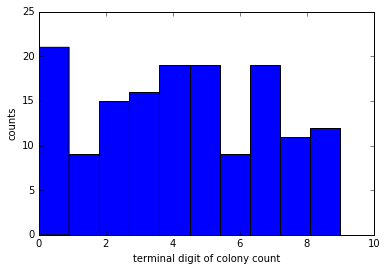

In [191]:
DATA_DIR = '../data/'
wb = load_workbook(DATA_DIR + 'Outside Lab 3.Colony Counts.2.4.10-5.21.12.xlsx') 

ws = wb.get_sheet_by_name('Sheet1')
rawData = []

for i in range(3, 53):
    for col in ['B','C','D']:
        try:
            rawData.append(float(ws[col + str(i)].value))
        except:
            # if empty cell, report location in spreadsheet
            print(col,i)
            
terminal_digit = [np.mod(c,10) for c in rawData]
counts = plt.hist(terminal_digit)
plt.ylabel('counts')
plt.xlabel('terminal digit of colony count')

chisq=0
exp = np.sum(counts[0])/10
for (i,c) in enumerate(counts[0]):
    chisq += (c-exp)**2/exp

In [192]:
print(chisq)
print(1-stats.chi2.cdf(chisq,9))

12.1333333333
0.205896575103


### Coulter counts: RTS

E 542
E 1252


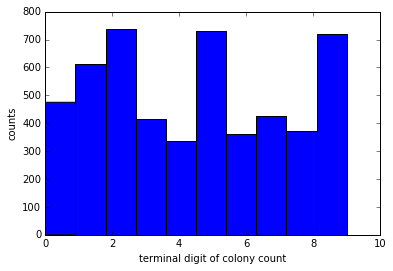

In [193]:
DATA_DIR = '../data/'
wb = load_workbook(DATA_DIR + 'Bishayee Coulter Counts.10.20.97-7.16.01.xlsx') 

ws = wb.get_sheet_by_name('Sheet1')
rawData = []

for i in range(3, 1732):
    for col in ['C','D','E']:
        try:
            rawData.append(float(ws[col + str(i)].value))
        except:
            # if empty cell, report location in spreadsheet
            print(col,i)
            
terminal_digit = [np.mod(c,10) for c in rawData]
counts = plt.hist(terminal_digit)
plt.ylabel('counts')
plt.xlabel('terminal digit of colony count')

chisq=0
exp = np.sum(counts[0])/10
for (i,c) in enumerate(counts[0]):
    chisq += (c-exp)**2/exp

In [194]:
print(chisq)
print(1-stats.chi2.cdf(chisq,9))

466.87463838
0.0


### Coulter counts: Others

E 61
E 62
E 63
E 64
E 66
E 67
E 68
E 69
E 70
E 71
E 72
E 73
E 74
E 75
E 76
E 77
E 78
E 79
E 80
E 81
E 82
E 83
E 84
E 85
E 86
E 87
E 88
E 99
E 100
E 101
E 102
E 103
E 104
E 105
E 106
E 107
E 108
E 109
E 110
E 111
E 112
E 113
E 114
E 115
E 116
E 117
E 118
E 133
E 134
E 135
E 136
E 137
E 138
E 314
E 315
E 316
E 317
E 318
E 319
E 323
E 324
E 325
E 327
E 463
C 673
E 696
D 704
E 704
E 719
E 724
E 725
E 726
E 727
E 728
E 781
E 814
E 867
E 970
E 972


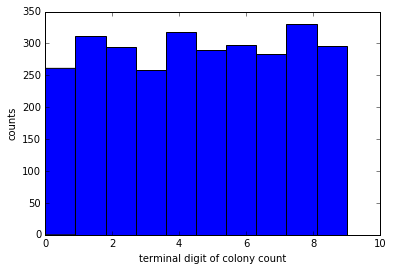

In [195]:
DATA_DIR = '../data/'
wb = load_workbook(DATA_DIR + 'Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.xlsx') 

ws = wb.get_sheet_by_name('Sheet1')
rawData = []

for i in range(3, 1010):
    for col in ['C','D','E']:
        try:
            rawData.append(float(ws[col + str(i)].value))
        except:
            # if empty cell, report location in spreadsheet
            print(col,i)
            
terminal_digit = [np.mod(c,10) for c in rawData]
counts = plt.hist(terminal_digit)
plt.ylabel('counts')
plt.xlabel('terminal digit of colony count')

chisq=0
exp = np.sum(counts[0])/10
for (i,c) in enumerate(counts[0]):
    chisq += (c-exp)**2/exp

In [196]:
print(chisq)
print(1-stats.chi2.cdf(chisq,9))

15.9945615228
0.0669952442852


### Coulter counts: Outside lab

D 41
D 42
D 43
D 44
D 45
D 46
D 47
D 48
D 49
D 50
D 51
D 52


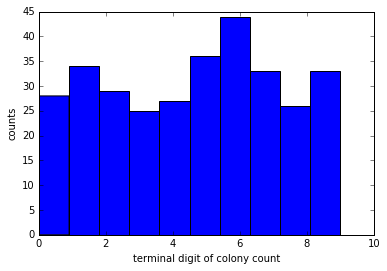

In [163]:
DATA_DIR = '../data/'
wb = load_workbook(DATA_DIR + 'Outside Lab 1.Coulter Counts.6.7.91-4.9.99.xlsx') 

ws = wb.get_sheet_by_name('Sheet1')
rawData = []

for i in range(2, 111):
    for col in ['B','C','D']:
        try:
            rawData.append(float(ws[col + str(i)].value))
        except:
            # if empty cell, report location in spreadsheet
            print(col,i)
            

terminal_digit = [np.mod(c,10) for c in rawData]
counts = plt.hist(terminal_digit)
plt.ylabel('counts')
plt.xlabel('terminal digit of colony count')

chisq=0
exp = np.sum(counts[0])/10
for (i,c) in enumerate(counts[0]):
    chisq += (c-exp)**2/exp

In [182]:
print(chisq)
print(1-stats.chi2.cdf(chisq,9))


9.47619047619
0.394527256696


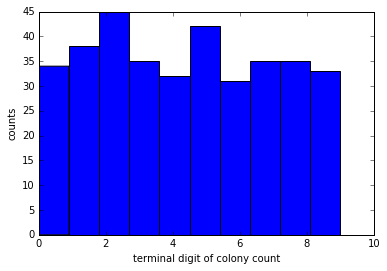

In [197]:
wb = load_workbook(DATA_DIR + 'Outside Lab 2.Coulter Counts.6.6.08-7.7.08.xlsx') 
rawData = []
ws = wb.get_sheet_by_name('Sheet1')         
            
for i in range(3, 123):
    for col in ['B','C','D']:
        try:
            rawData.append(float(ws[col + str(i)].value))
        except:
            # if empty cell, report location in spreadsheet
            print(col,i)
            
terminal_digit = [np.mod(c,10) for c in rawData]
counts = plt.hist(terminal_digit)
plt.ylabel('counts')
plt.xlabel('terminal digit of colony count')

chisq=0
exp = np.sum(counts[0])/10
for (i,c) in enumerate(counts[0]):
    chisq += (c-exp)**2/exp

In [198]:
print(chisq)
print(1-stats.chi2.cdf(chisq,9))

4.94444444444
0.839124024195
